In [3]:
# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)
#par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
library(ggplot2)
library(data.table)
library(tidyverse)
library(dplyr)

#install.packages()
#resource https://blog.princehonest.com/stat-learning/

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'mlr'


The following object is masked from 'package:e1071':

    impute


Loading required package: ggplot2

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:mlr':

    train


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1
v purrr   0.3.4     

-- Conflicts ------------------------------------

## Q1

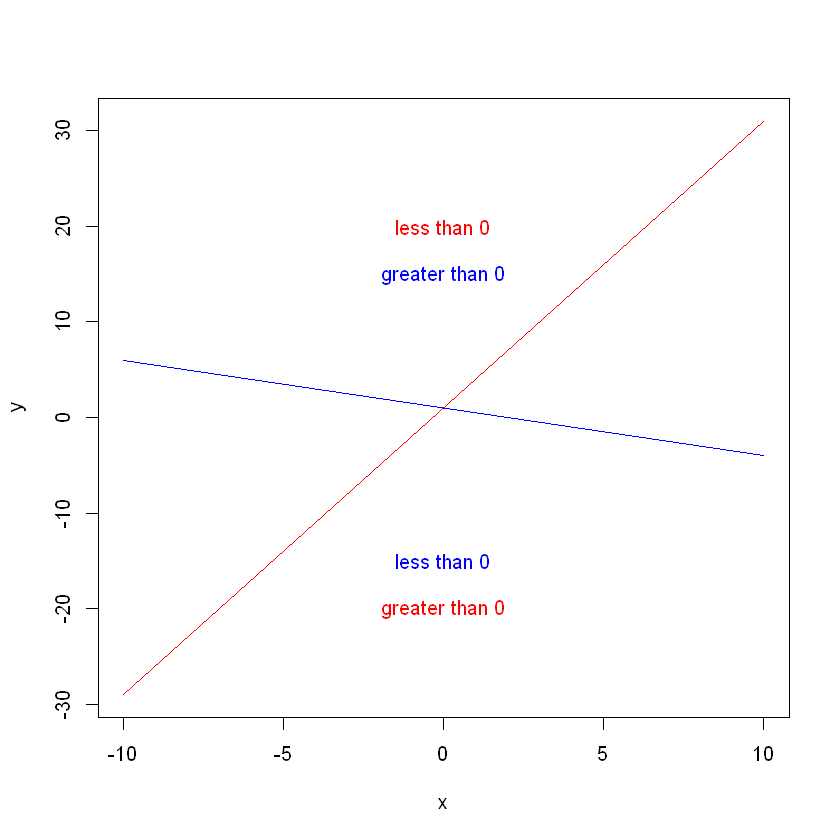

In [11]:
#part a
x = range(-10,10,0.01)
y = 1 + 3 * x
plot(x, y, type = "l", col = "red")
text(c(0), c(-20), "greater than 0", col = "red")
text(c(0), c(20), "less than 0", col = "red")
#part b
z=1-x/2
lines(x, z, type = "l", col = "blue")
text(c(0), c(-15), "less than 0", col = "blue")
text(c(0), c(15), "greater than 0", col = "blue")

## Q2

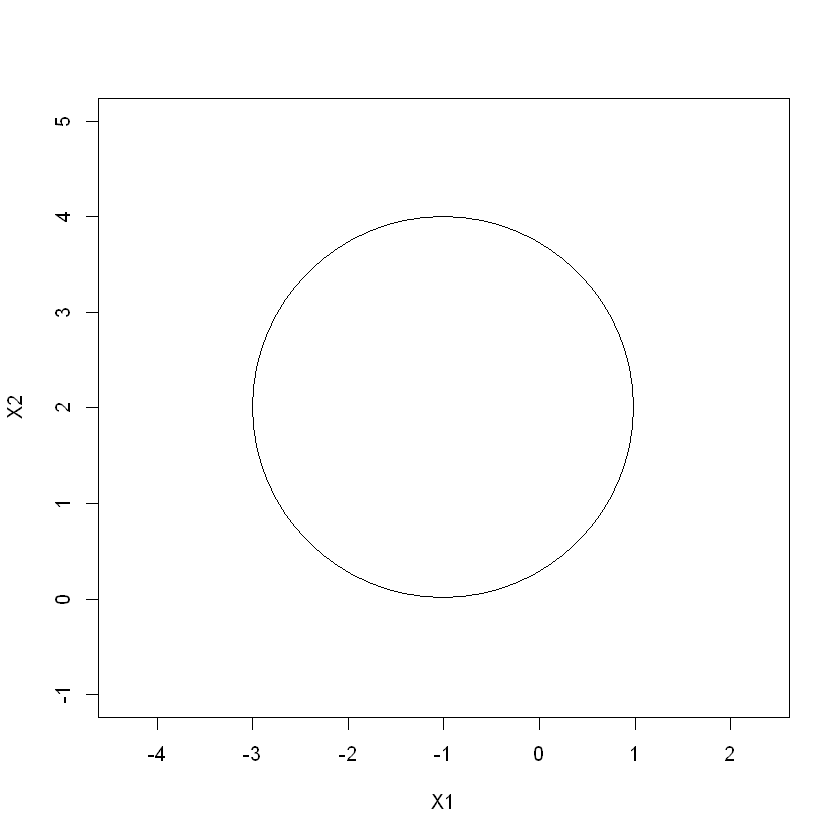

In [12]:
#part a

r <- 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)

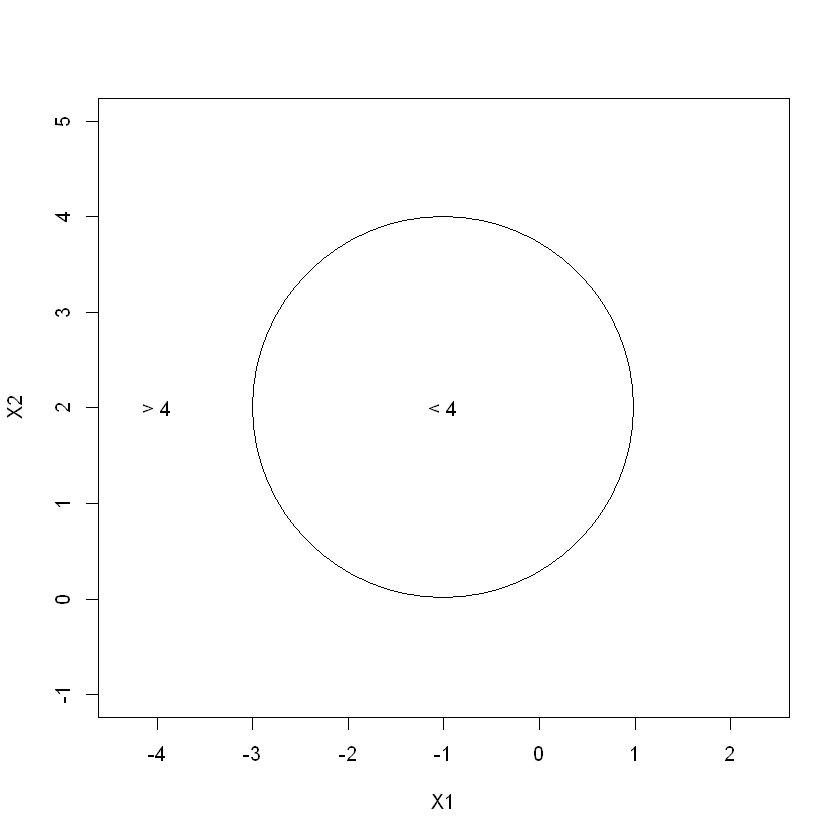

In [13]:
#part b
r <- 2
plot(NA, NA, type = "n", xlim = c(-4, 2), ylim = c(-1, 5), asp = 1, xlab = "X1", 
    ylab = "X2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)
text(c(-1), c(2), "< 4")
text(c(-4), c(2), "> 4")

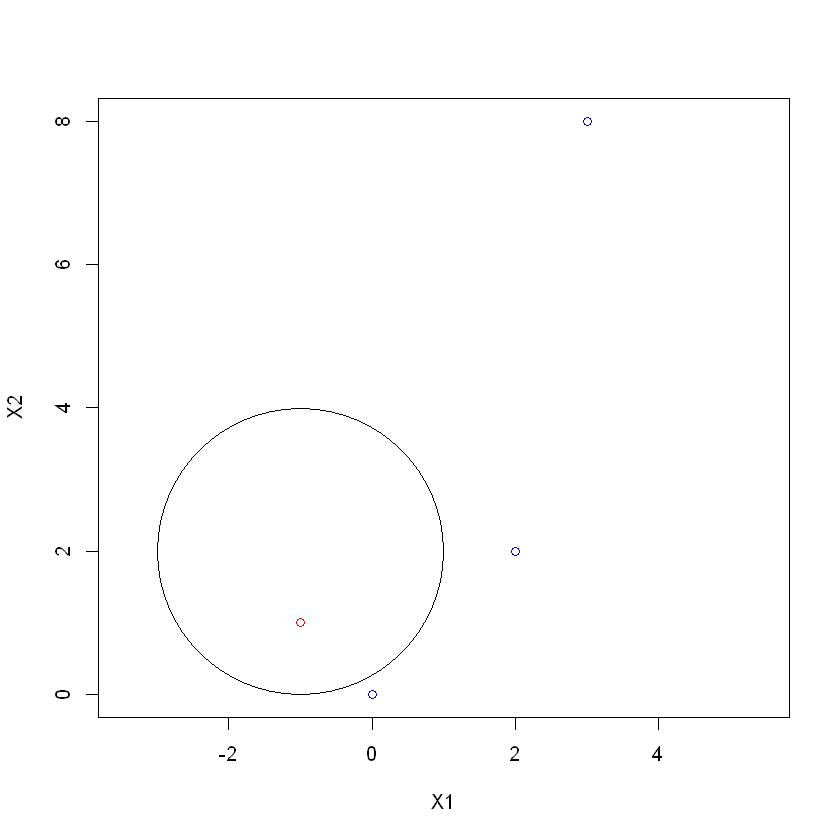

In [14]:
#part c
r <- 2
plot(c(0, -1, 2, 3), c(0, 1, 2, 8), col = c("blue", "red", "blue", "blue"), 
    type = "p", asp = 1, xlab = "X1", ylab = "X2")
symbols(c(-1), c(2), circles = c(r), add = TRUE, inches = FALSE)

In [ ]:
#The decision boundary is a sum of quadratic terms when expanded.

## Q4

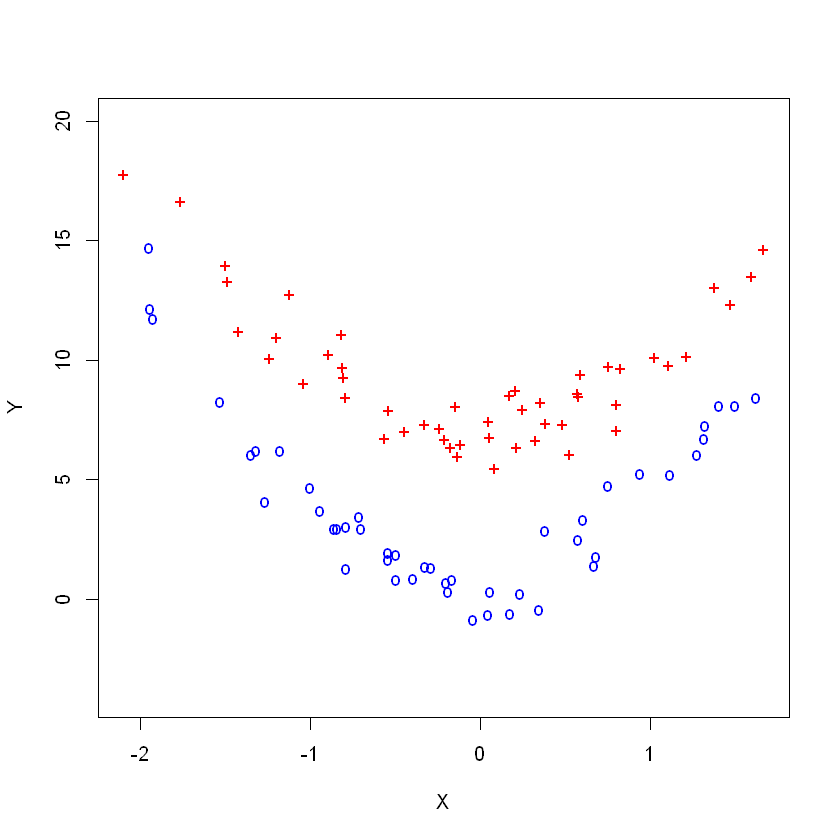

In [1]:
set.seed(131)
x = rnorm(100)
y = 3 * x^2 + 4 + rnorm(100)
train = sample(100, 50)
y[train] = y[train] + 3
y[-train] = y[-train] - 3
# Plot using different colors
plot(x[train], y[train], pch="+", lwd=4, col="red", ylim=c(-4, 20), xlab="X", ylab="Y")
points(x[-train], y[-train], pch="o", lwd=4, col="blue")

In [2]:
set.seed(315)
z = rep(0, 100)
z[train] = 1
# Take 25 observations each from train and -train
final.train = c(sample(train, 25), sample(setdiff(1:100, train), 25))
data.train = data.frame(x=x[final.train], y=y[final.train], z=as.factor(z[final.train]))
data.test = data.frame(x=x[-final.train], y=y[-final.train], z=as.factor(z[-final.train]))


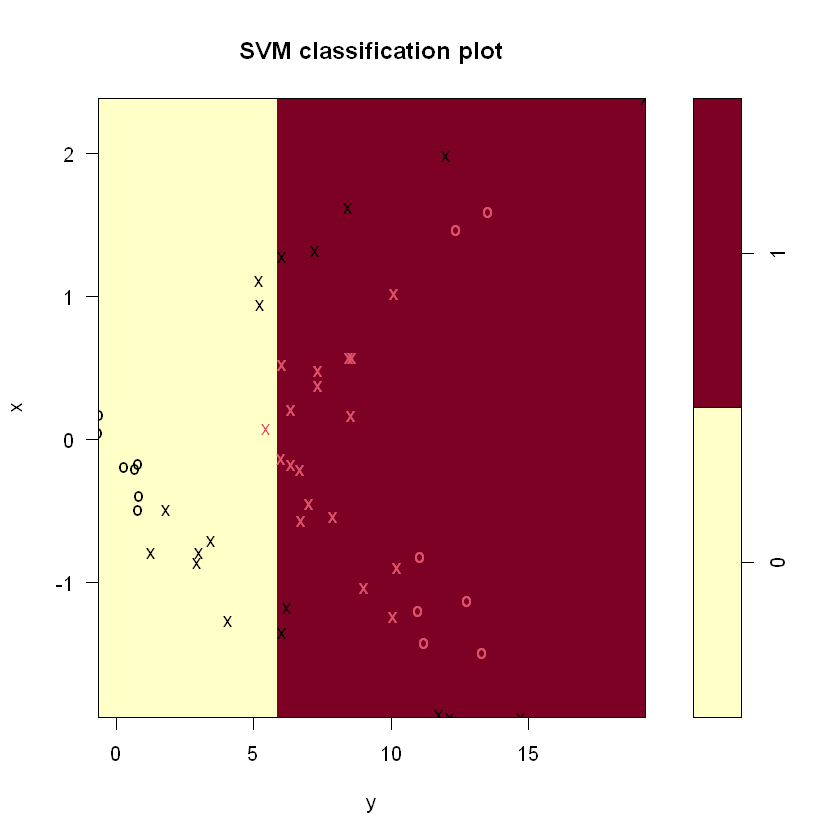

In [4]:
svm.linear = svm(z~., data=data.train, kernel="linear", cost=10)
plot(svm.linear, data.train)

In [5]:
table(z[final.train], predict(svm.linear, data.train))


   
     0  1
  0 15 10
  1  1 24

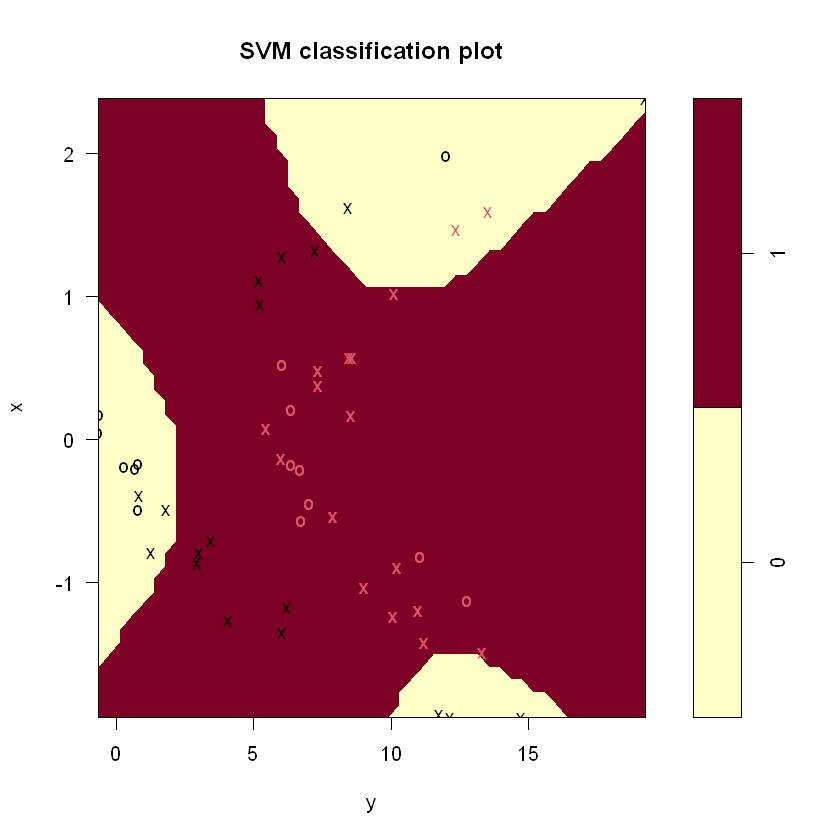

In [6]:
set.seed(32545)
svm.poly = svm(z~., data=data.train, kernel="polynomial", cost=10)
plot(svm.poly, data.train)

In [7]:
table(z[final.train], predict(svm.poly, data.train))


   
     0  1
  0 15 10
  1  2 23

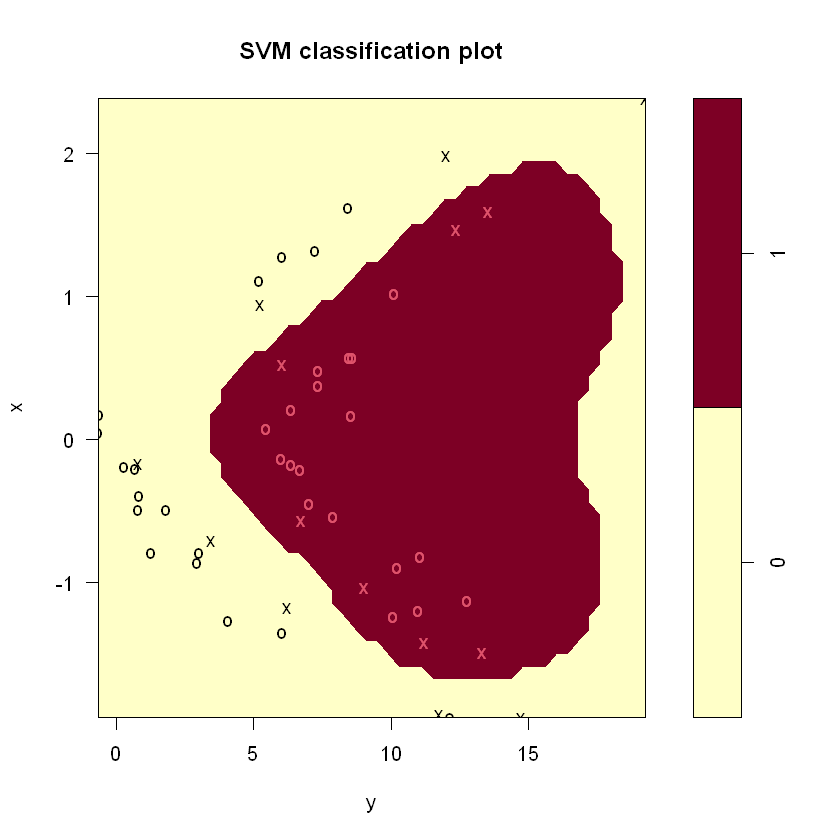

In [8]:
set.seed(996)
svm.radial = svm(z~., data=data.train, kernel="radial", gamma=1, cost=10)
plot(svm.radial, data.train)

In [9]:
table(z[final.train], predict(svm.radial, data.train))

   
     0  1
  0 25  0
  1  0 25

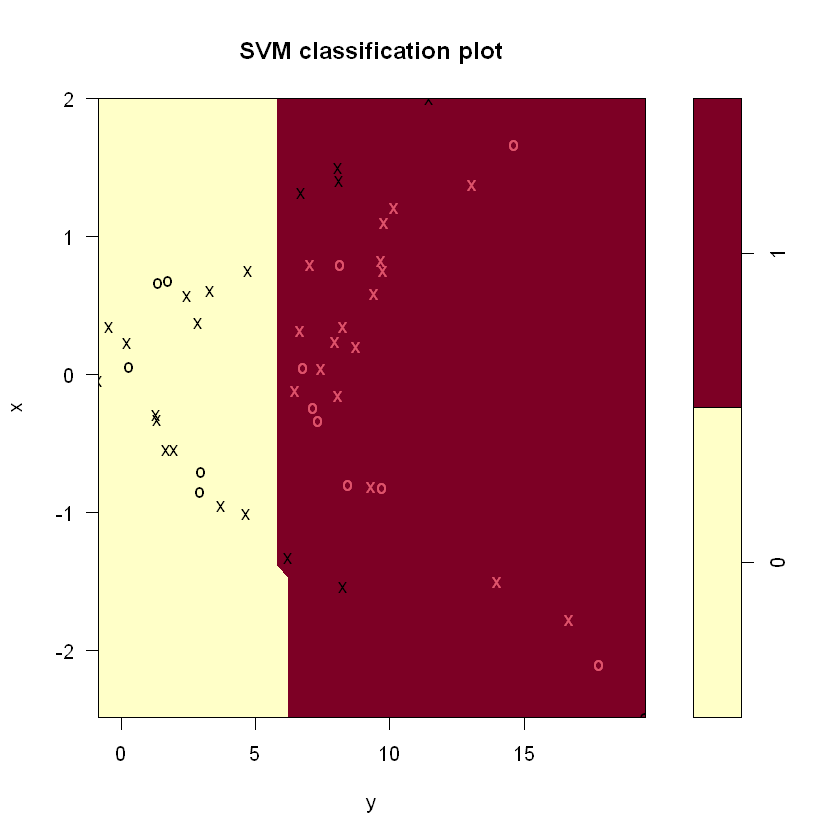

In [10]:
plot(svm.linear, data.test)

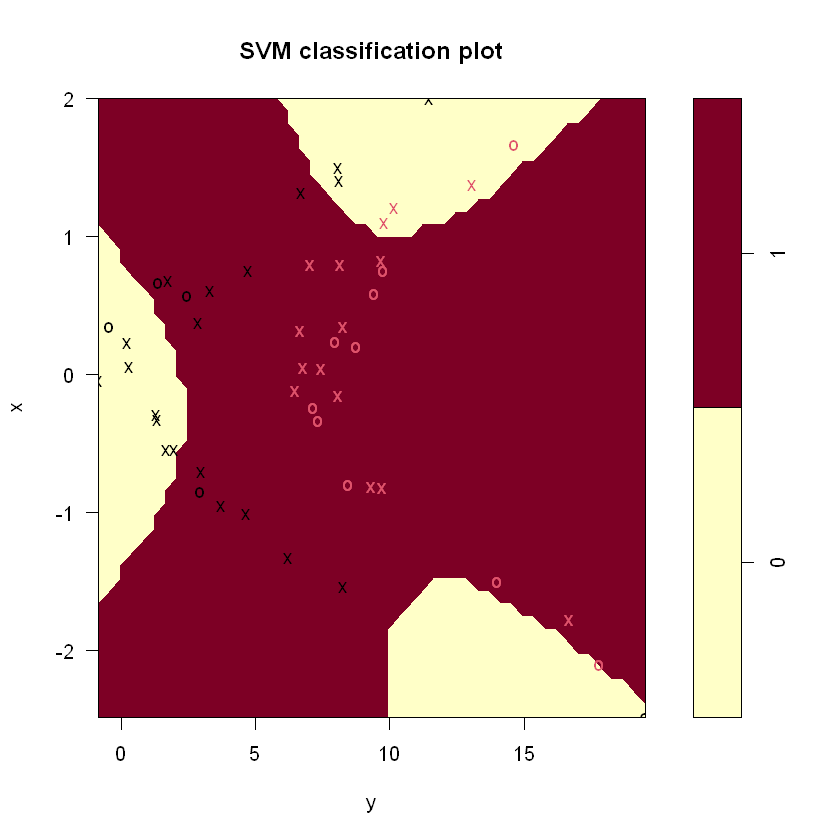

In [11]:
plot(svm.poly, data.test)

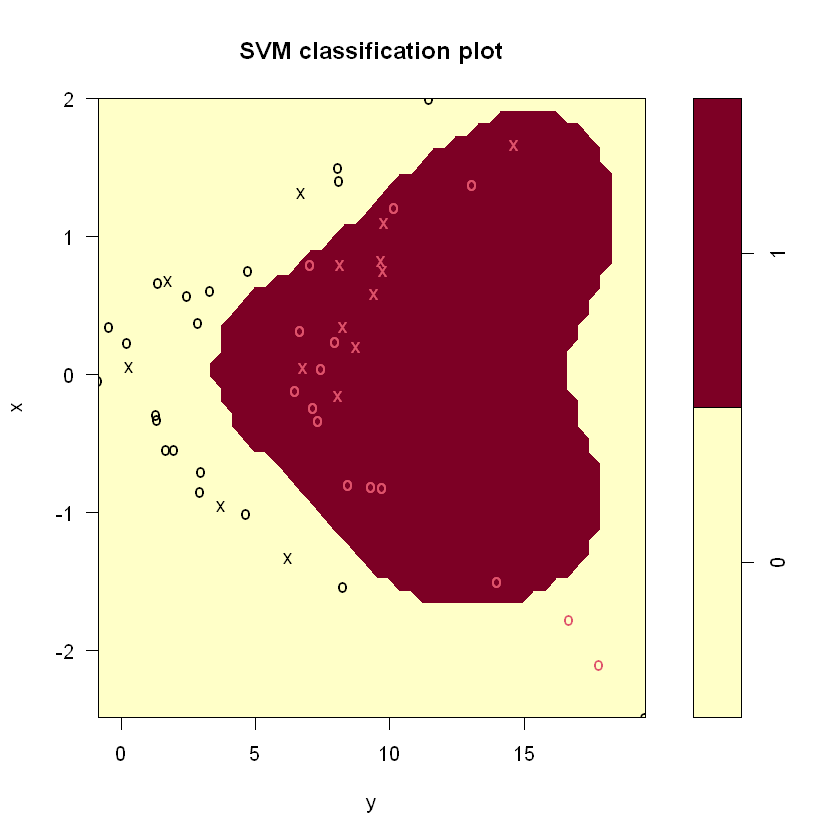

In [12]:
plot(svm.radial, data.test)


In [13]:
table(z[-final.train], predict(svm.linear, data.test))


   
     0  1
  0 18  7
  1  0 25

In [14]:
table(z[-final.train], predict(svm.poly, data.test))


   
     0  1
  0 12 13
  1  4 21

In [15]:
table(z[-final.train], predict(svm.radial, data.test))


   
     0  1
  0 25  0
  1  2 23

The tables show that linear, polynomial and radial basis kernels classify 6, 14, and 0 test points incorrectly respectively. Radial basis kernel is the best and has a zero test misclassification error.

## Q7

## Q8